In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Data Collection and Processing

In [10]:
gold_dataset=pd.read_csv("C:/Users/dell/Downloads/archive (11)/gld_price_data.csv")

In [7]:
gold_dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [13]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [15]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
gold_dataset.shape

(2290, 6)

In [17]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [31]:
gold_data=gold_dataset.drop(columns='Date')

In [32]:
# Find coorelation
corelation=gold_data.corr()

<Axes: >

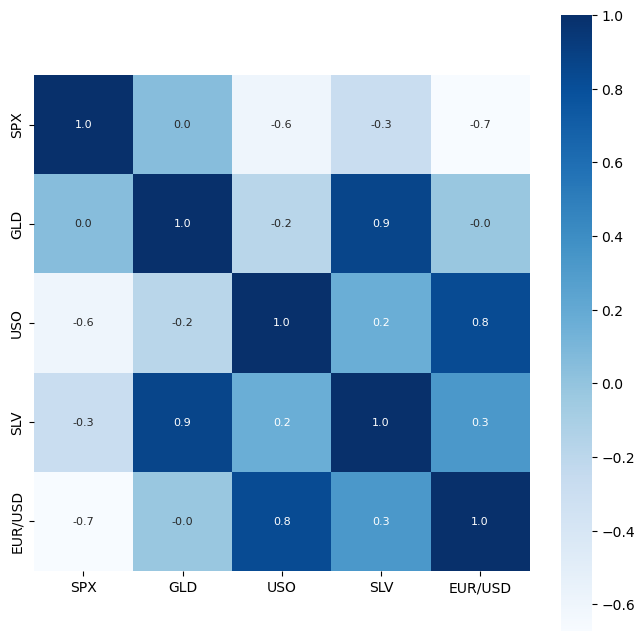

In [33]:
#Construct heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [34]:
print(corelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\dell\AppData\Local\Temp\ipykernel_9172\1854168806.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

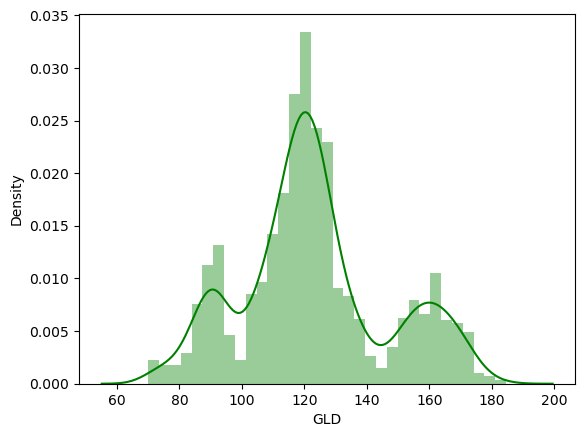

In [35]:
sns.distplot(gold_dataset['GLD'],color='green')

In [39]:
#Separate features and target
x=gold_dataset.drop(['Date','GLD'], axis=1)
y=gold_dataset['GLD']

In [41]:
x
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [42]:
#Apply train test split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=2)

In [43]:
#Model Training RandomForest Regressor

In [44]:
regressor=RandomForestRegressor(n_estimators=100)

In [45]:
regressor

RandomForestRegressor()

In [46]:
#Fit the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
#Find Predicted values
y_train_pred=regressor.predict(x_train)
y_test_pred=regressor.predict(x_test)

In [54]:
print(y_train_pred)

[109.92289792 114.8626008   90.81290031 ... 130.72399652 159.25909552
 114.75949982]


In [55]:
print(y_test_pred)

[168.68429978  81.84849984 116.1841002  127.57630091 120.59190089
 154.57549836 150.35219815 126.13070005 117.4546987  125.91610064
 116.88760075 171.48150067 141.24099933 167.95879894 115.08209977
 117.69460047 138.55470307 170.58730127 159.25520245 159.72069858
 155.27540033 125.45730015 175.70449961 157.80840349 125.13750068
  93.60449954  77.79749997 120.21229965 119.04989939 167.45649989
  88.25510033 125.4066004   90.9110006  117.69070028 121.17989935
 136.74480078 115.45930111 115.13860081 148.34320011 107.2581009
 104.29380246  87.09719798 126.58110056 118.03429977 152.40999858
 119.77190022 108.53469985 108.34039823  93.21180069 127.09849775
  74.88210032 113.70459947 121.13030007 111.09609915 118.91739902
 120.92109909 159.61280067 168.77290098 147.27799697  85.88249874
  94.11970028  86.82939857  90.70740002 118.91810079 126.45050052
 127.59459978 170.30300041 122.33969916 117.48389869  98.34010035
 168.04550022 142.89919807 132.44290266 121.0479023  121.42449963
 119.666800

In [58]:
#find accuracy score
R2_train_score=metrics.r2_score(y_train,y_train_pred)
R2_test_score=metrics.r2_score(y_test,y_test_pred)

In [59]:
print(f'The accuracy score of training data is {R2_train_score}')
print(f'The accuracy score of test data sis {R2_test_score}')

The accuracy score of training data is 0.9985432639698276
The accuracy score of test data sis 0.9893932167872307


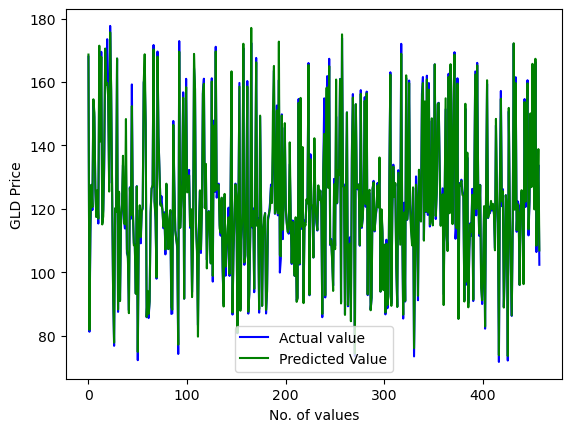

In [62]:
#Visualise the predicted and actual value
plt.plot(list(y_test), color='Blue',label='Actual value')
plt.plot(list(y_test_pred), color ='green', label='Predicted Value')
plt.xlabel('No. of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [63]:
#Try with another model

In [66]:
from sklearn.linear_model import Lasso

In [67]:
model=Lasso()

In [68]:
model

Lasso()

In [71]:
model.fit(x_train,y_train)

Lasso()

In [73]:
#Find Predicted values
y_train_pred1=model.predict(x_train)
y_test_pred1=model.predict(x_test)

In [74]:
#find accuracy score
R2_train_score1=metrics.r2_score(y_train,y_train_pred1)
R2_test_score1=metrics.r2_score(y_test,y_test_pred1)

In [75]:
print(f'The accuracy score of training data is {R2_train_score1}')
print(f'The accuracy score of test data sis {R2_test_score1}')

The accuracy score of training data is 0.8843915387307152
The accuracy score of test data sis 0.8644937172756186


In [76]:
#Try with scaling 

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc=StandardScaler()

In [79]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [83]:
regressor1=RandomForestRegressor(n_estimators=100)

In [84]:
regressor1

RandomForestRegressor()

In [85]:
regressor1.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [89]:
y_train_pred2=regressor1.predict(x_train_scaled)
y_test_pred2=regressor1.predict(x_test_scaled)

In [90]:
Train_score=metrics.r2_score(y_train,y_train_pred2)
Test_score=metrics.r2_score(y_test,y_test_pred2)

In [92]:
print(f'Train Score is {Train_score:4f}')
print(f'Test Score is {Test_score:4f}')

Train Score is 0.998563
Test Score is 0.988939


In [ ]:
The accuracy score of training data is 0.9985432639698276
The accuracy score of test data sis 0.9893932167872307